In [1]:
%matplotlib ipympl

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sift_results = pd.read_csv('result.csv')
sift_results

,generation,max_deg,size_construction,size_search,alpha,build_time,memory,search_time,recall
0,0,173,371,251,1.275391,0.568670,0,0.003892,1.0000
1,0,694,605,241,1.262695,0.855812,0,0.002198,1.0000
2,0,788,756,964,1.935547,4.490767,0,0.005626,1.0000
3,0,1003,264,683,1.640625,0.736664,0,0.003887,1.0000
4,0,836,681,236,1.089844,0.616388,0,0.001453,1.0000
...,...,...,...,...,...,...,...,...,...
5045,100,7,103,914,1.014648,0.150250,0,0.002026,0.9976
5046,100,129,901,162,1.152344,0.784252,0,0.001330,0.9999
5047,100,13,101,160,1.183594,0.169911,0,0.000831,0.9951
5048,100,129,101,121,1.024414,0.180212,0,0.000896,0.9971


<Axes: xlabel='build_time', ylabel='search_time'>

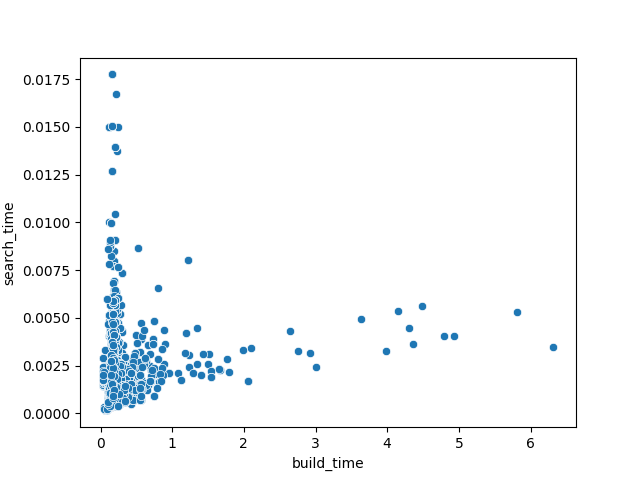

In [2]:
sns.scatterplot(sift_results, x='build_time', y='search_time')

In [3]:
sns.scatterplot(sift_results, x='build_time', y='recall')

<Axes: xlabel='build_time', ylabel='search_time'>

In [4]:
sns.scatterplot(sift_results, x='search_time', y='recall')

<Axes: xlabel='build_time', ylabel='search_time'>

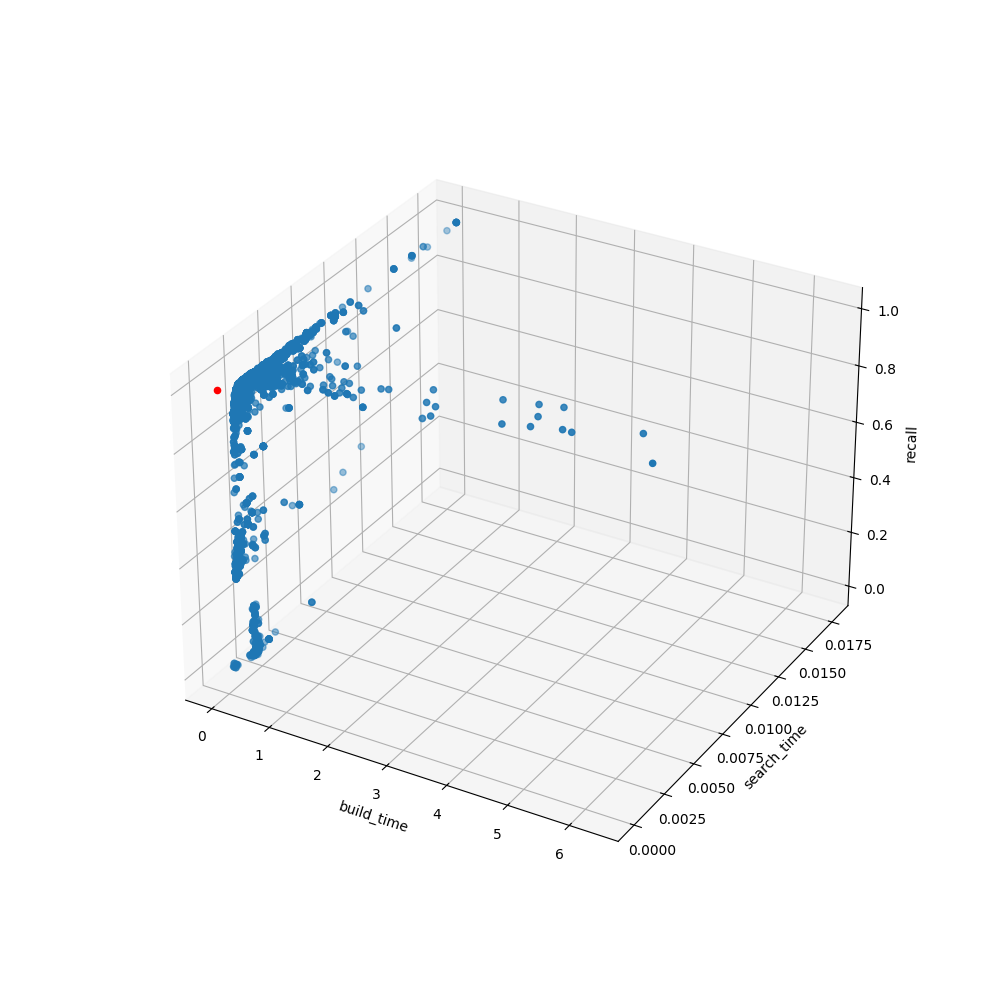

In [5]:
plt.figure(figsize=(10, 10))
axes = plt.axes(projection='3d')
axes.scatter3D(sift_results['build_time'], sift_results['search_time'], sift_results['recall'])
axes.scatter3D([0.0], [0.0], [1.0], c='r')
axes.set_xlabel('build_time')
axes.set_ylabel('search_time')
axes.set_zlabel('recall')
plt.savefig('./images/3d-bsr.png')
plt.show()

In [6]:
def distance_from_perfection(data_point: np.ndarray):
    build_time = data_point[5]
    search_time = data_point[7]
    recall = data_point[8]

    total_weight = np.array([1, 2, 3])
    squared_error = np.array([build_time ** 2, search_time ** 2, (recall - 1) ** 2])
    return squared_error @ total_weight

# sift_results.to_numpy()

In [7]:
sorted_res = sorted(sift_results.to_numpy(), key=distance_from_perfection)
top10 = pd.DataFrame(sorted_res[:10], columns=sift_results.columns).drop("memory", axis=1)
top10["WS"] = [distance_from_perfection(e) for e in sorted_res[:10]]
top10

,generation,max_deg,size_construction,size_search,alpha,build_time,search_time,recall,WS
0,22.0,1.0,121.0,113.0,1.628906,0.031291,0.001461,0.9333,0.014330
1,38.0,5.0,101.0,697.0,1.089844,0.126652,0.001413,0.9732,0.018200
2,39.0,5.0,101.0,697.0,1.089844,0.126652,0.001413,0.9732,0.018200
3,40.0,5.0,101.0,697.0,1.089844,0.126652,0.001413,0.9732,0.018200
4,32.0,5.0,101.0,644.0,1.125977,0.126631,0.001357,0.9726,0.018291
5,33.0,5.0,101.0,644.0,1.125977,0.126631,0.001357,0.9726,0.018291
6,34.0,5.0,101.0,644.0,1.125977,0.126631,0.001357,0.9726,0.018291
7,35.0,5.0,101.0,644.0,1.125977,0.126631,0.001357,0.9726,0.018291
8,89.0,7.0,101.0,226.0,1.014648,0.131558,0.000819,0.9805,0.018450
9,90.0,7.0,101.0,226.0,1.014648,0.131558,0.000819,0.9805,0.018450


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


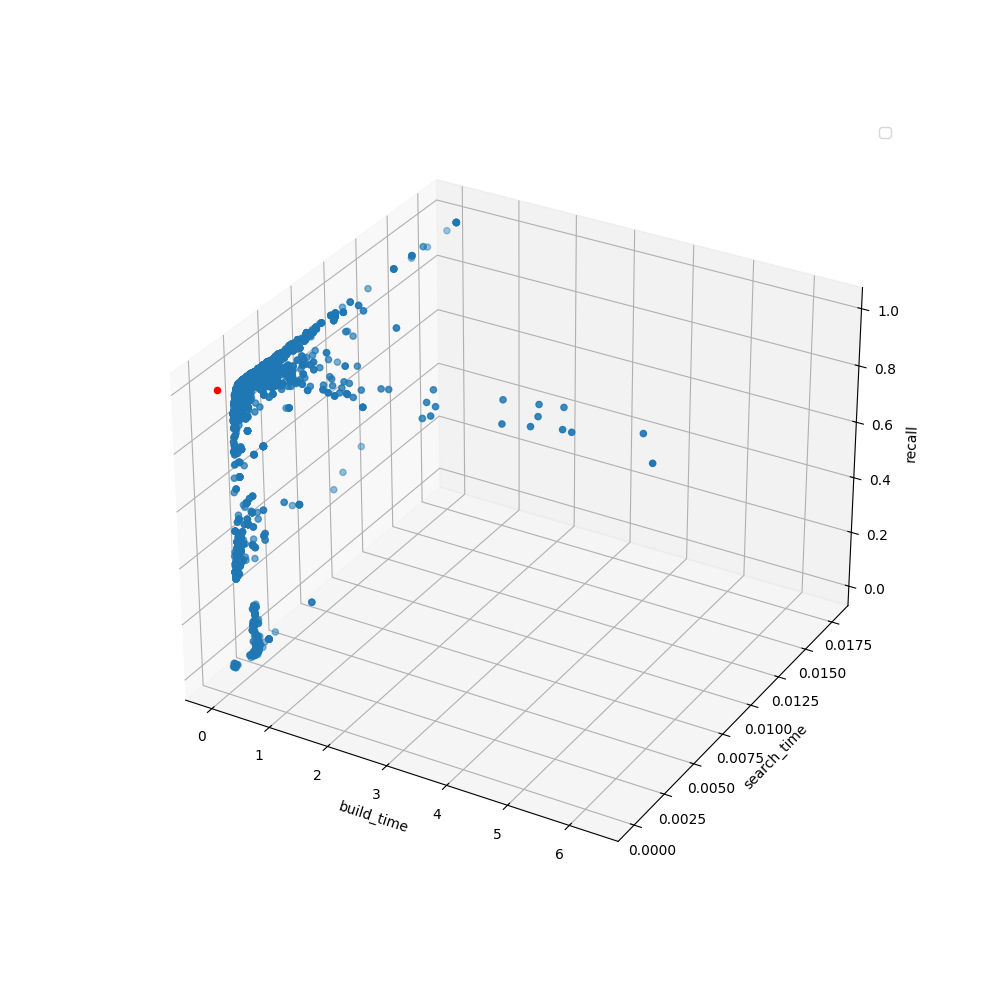

In [9]:
plt.figure(figsize=(10, 10))
axes = plt.axes(projection='3d')

# sift_results = sift_results.groupby("generation").mean()
axes.scatter3D(sift_results['build_time'], sift_results['search_time'], sift_results['recall'])
axes.scatter3D([0.0], [0.0], [1.0], c='r')
axes.scatter3D(top10['build_time'], top10['search_time'], top10['recall'], c="orange")

axes.set_xlabel('build_time')
axes.set_ylabel('search_time')
axes.set_zlabel('recall')
plt.savefig('./images/3d-top10.png')
plt.legend()
plt.show()